In [1]:
!pip install -q kaggle

In [7]:
!kaggle datasets download -d odins0n/ucf-crime-dataset

Dataset URL: https://www.kaggle.com/datasets/odins0n/ucf-crime-dataset
License(s): CC0-1.0
... resuming from 11575230464 bytes (252050343 bytes left) ...
100%|█████████████████████████████████████▉| 11.0G/11.0G [01:15<00:00, 2.96MB/s]
100%|██████████████████████████████████████| 11.0G/11.0G [01:16<00:00, 3.31MB/s]


In [8]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 3.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 4.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 3.7 MB/s eta 0:00:000:00:010:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.1 MB/s eta 0:00:004.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 4.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [2]:
!unzip ucf-crime-dataset.zip


Archive:  ucf-crime-dataset.zip
replace Test/Abuse/Abuse028_x264_0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
!pip install scikit-learn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 221.7 kB/s eta 0:00:00a 0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 542.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 934.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 710.0 kB/s eta 0:00:00a 0:00:01


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [4]:
train_dir = 'Test'
test_dir = 'Train'
img_size = 64
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 111308 images belonging to 14 classes.
Found 1266345 images belonging to 14 classes.


In [5]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))  # 14 classes

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/media/pranjal/New Volume/CODES/Public/Deep_Learning/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,006 (2.61 MB)

 Trainable params: 685,006 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

img_size = 64
batch_size = 32

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_dir = 'Train'
test_dir = 'Test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

checkpoint = ModelCheckpoint(
    'model_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_best_only=False
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=4,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[checkpoint]
)


/media/pranjal/New Volume/CODES/Public/Deep_Learning/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,006 (2.61 MB)

 Trainable params: 685,006 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 1266345 images belonging to 14 classes.
Found 111308 images belonging to 14 classes.
Epoch 1/10


/media/pranjal/New Volume/CODES/Public/Deep_Learning/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  357/39574 ━━━━━━━━━━━━━━━━━━━━ 1:04:18 98ms/step - accuracy: 0.7403 - loss: 1.2915

KeyboardInterrupt: 

In [13]:
def evaluate_model_at_epoch(model, weights_file, test_generator):
    # Load the weights for the given epoch
    model.load_weights(weights_file)
    
    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    
    return test_loss, test_accuracy

# File paths for the saved weights for each epoch (adjust paths if needed)
weight_files = [
    'model_epoch_01.weights.h5',
    'model_epoch_02.weights.h5',
    'model_epoch_03.weights.h5',
    'model_epoch_04.weights.h5'
]

epoch_losses = []
epoch_accuracies = []

for weights_file in weight_files:
    loss, accuracy = evaluate_model_at_epoch(model, weights_file, test_generator)
    epoch_losses.append(loss)
    epoch_accuracies.append(accuracy)

print("Epoch Losses:", epoch_losses)
print("Epoch Accuracies:", epoch_accuracies)


3479/3479 ━━━━━━━━━━━━━━━━━━━━ 203s 58ms/step - accuracy: 0.5565 - loss: 3.5338
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 148s 42ms/step - accuracy: 0.5577 - loss: 3.5032
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 132s 38ms/step - accuracy: 0.5484 - loss: 3.4591
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 138s 40ms/step - accuracy: 0.5483 - loss: 3.4463
Epoch Losses: [3.5003674030303955, 3.500372886657715, 3.441629409790039, 3.441622495651245]
Epoch Accuracies: [0.5599148273468018, 0.5599148273468018, 0.5503018498420715, 0.5503018498420715]


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

img_size = 64
batch_size = 32

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(14, activation='softmax'))  # Output layer for 14 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


2024-09-17 18:15:44.517581: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-17 18:15:44.519207: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-17 18:15:44.524532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-17 18:15:44.535471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 18:15:44.548430: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,006 (2.61 MB)

 Trainable params: 685,006 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import h5py

weights_file= 'model_epoch_09.weights.h5'
import h5py
with h5py.File(weights_file, 'w') as fw:
    vals1 = [[1., 2., 3.], [11., 12., 13.], [21., 22., 23.]] 
    fw.create_dataset('xxxx', data=vals1)
    vals2 = [[101., 102., 103.], [111., 112., 113.], [121., 122., 123.]]
    fw.create_dataset('yyyy', data=vals2)
    vals3 = [[1001., 1002., 1003.], [1011., 1012., 1013.], [1021., 1022., 1023.]]
    fw.create_dataset('zzzz', data=vals3)
with h5py.File(weights_file, 'r') as fr:
    print(fr['xxxx'].shape, fr['xxxx'].dtype)
    print(fr['xxxx'][()])
    print(fr['yyyy'][()])
    print(fr['zzzz'][()])
    for dset in fr.keys():
        print(dset,":",fr[dset].shape, fr[dset].dtype)
        print(fr[dset][()])

(3, 3) float64
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]]
[[101. 102. 103.]
 [111. 112. 113.]
 [121. 122. 123.]]
[[1001. 1002. 1003.]
 [1011. 1012. 1013.]
 [1021. 1022. 1023.]]
xxxx : (3, 3) float64
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]]
yyyy : (3, 3) float64
[[101. 102. 103.]
 [111. 112. 113.]
 [121. 122. 123.]]
zzzz : (3, 3) float64
[[1001. 1002. 1003.]
 [1011. 1012. 1013.]
 [1021. 1022. 1023.]]


In [25]:
import h5py

def recursively_print_datasets(group, indent=0):
    """Recursively prints datasets and their details inside a group."""
    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Dataset):
            print(f"{' ' * indent}{key} : {item.shape} {item.dtype}")
            print(item[()])
        elif isinstance(item, h5py.Group):
            print(f"{' ' * indent}{key} is a group:")
            recursively_print_datasets(item, indent + 4)

def read_hdf5_file(file_name):
    with h5py.File(file_name, 'r') as fr:
        recursively_print_datasets(fr)

for epoch_num in range(1, 11):
    weights_file = f'model_epoch_{epoch_num:02d}.weights.h5'
    print(f"Reading {weights_file}:")
    read_hdf5_file(weights_file)
    print("-" * 50)  # Separator between files


Reading model_epoch_01.weights.h5:
layers is a group:
    conv2d is a group:
        vars is a group:
            0 : (3, 3, 3, 32) float32
[[[[ 1.98423266e-01 -2.92434126e-01 -1.54888466e-01 -8.89294371e-02
     1.54956058e-01 -1.07216820e-01 -9.88425165e-02 -8.63659203e-01
     1.17811613e-01  1.57782242e-01  2.06805438e-01 -9.73906144e-02
     1.18337065e-01 -2.53699362e-01 -2.18375862e-01  2.38138720e-01
     1.80550247e-01  4.35447283e-02 -1.06780745e-01  1.81980431e-01
    -1.08828865e-01  2.45132800e-02  1.05742561e-02 -1.65590882e-01
    -9.10648778e-02  2.84544557e-01  7.55833462e-02 -1.56661481e-01
    -4.80048388e-01  3.50694656e-02  1.37123868e-01 -2.04011589e-01]
   [ 1.66857973e-01 -2.25728229e-01 -1.76704139e-01 -1.23553574e-01
    -5.89429662e-02  5.88906109e-02 -2.16353491e-01 -6.60744607e-01
     2.36629978e-01  2.59942174e-01  1.19165838e-01  1.81997716e-02
     1.93243157e-02 -1.83465406e-01  2.02351555e-01  2.01929748e-01
    -5.67380898e-03 -6.96659014e-02 -1.3960

In [29]:
for layer in model.layers:
    print(f"Layer name: {layer.name}")
    print(f"Layer configuration: {layer.get_config()}")
    if layer.get_weights():
        print(f"Weights shape: {[w.shape for w in layer.get_weights()]}")
    print("-" * 50)


Layer name: conv2d
Layer configuration: {'name': 'conv2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Weights shape: [(3, 3, 3, 32), (32,)]
--------------------------------------------------
Layer name: max_pooling2d
Layer configuration: {'name': 'max_pooling2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DType

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

def plot_conv_filters(weights, layer_name, epoch, num_filters=6):
    """Plot convolutional filters for a given layer."""
    filters = weights[0]
    num_filters = min(num_filters, filters.shape[-1])

    fig, axes = plt.subplots(1, num_filters, figsize=(20, 5))
    fig.suptitle(f'{layer_name} filters (Epoch {epoch})', fontsize=16)

    for i in range(num_filters):
        filter_ = filters[:, :, :, i]
        axes[i].imshow(filter_[:, :, 0], cmap='viridis')
        axes[i].axis('off')
    
    plt.show()

def plot_dense_weights(weights, layer_name, epoch):
    """Plot dense layer weights."""
    dense_weights = weights[0]

    plt.figure(figsize=(8, 8))
    plt.imshow(dense_weights, cmap='viridis')
    plt.colorbar()
    plt.title(f'{layer_name} weights (Epoch {epoch})')
    plt.show()

def read_and_plot_weights(file_name, epoch):
    """Read weights from an HDF5 file and plot Conv2D and Dense layers."""
    with h5py.File(file_name, 'r') as fr:
        for layer_name in fr:
            layer_group = fr[layer_name]
            if 'conv' in layer_name:
                if 'vars' in layer_group:
                    filters = layer_group['vars'][()]
                    plot_conv_filters([filters], layer_name, epoch)
            elif 'dense' in layer_name:
                if 'vars' in layer_group:
                    weights = layer_group['vars'][()]
                    plot_dense_weights(weights, layer_name, epoch)

for epoch_num in range(1, 11):
    weights_file = f'model_epoch_{epoch_num:02d}.weights.h5'
    print(f"Processing {weights_file}:")
    read_and_plot_weights(weights_file, epoch_num)
    print("-" * 50)


Processing model_epoch_01.weights.h5:
--------------------------------------------------
Processing model_epoch_02.weights.h5:
--------------------------------------------------
Processing model_epoch_03.weights.h5:
--------------------------------------------------
Processing model_epoch_04.weights.h5:
--------------------------------------------------
Processing model_epoch_05.weights.h5:
--------------------------------------------------
Processing model_epoch_06.weights.h5:
--------------------------------------------------
Processing model_epoch_07.weights.h5:
--------------------------------------------------
Processing model_epoch_08.weights.h5:
--------------------------------------------------
Processing model_epoch_09.weights.h5:
--------------------------------------------------
Processing model_epoch_10.weights.h5:
--------------------------------------------------


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Step 1: Load Your Model
# Load your trained model (if not already loaded)
model = load_model('model_epoch_10.weights.h5')

# Step 2: Load and Preprocess Test Data
test_datagen = ImageDataGenerator(rescale=1./255)  # Adjust preprocessing as needed

test_generator = test_datagen.flow_from_directory(
    'path_to_test_directory',
    target_size=(img_size, img_size),  # Adjust to match your model input size
    batch_size=32,  # Adjust batch size
    class_mode='categorical',  # For multi-class classification
    shuffle=False)  # Important for confusion matrix

# Step 3: Predict Using Your Model
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 4: Plot the Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='viridis')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have class names in the test_generator
labels = list(test_generator.class_indices.keys())
plot_confusion_matrix(y_true, y_pred, labels)


ValueError: No model config found in the file at model_epoch_10.weights.h5.

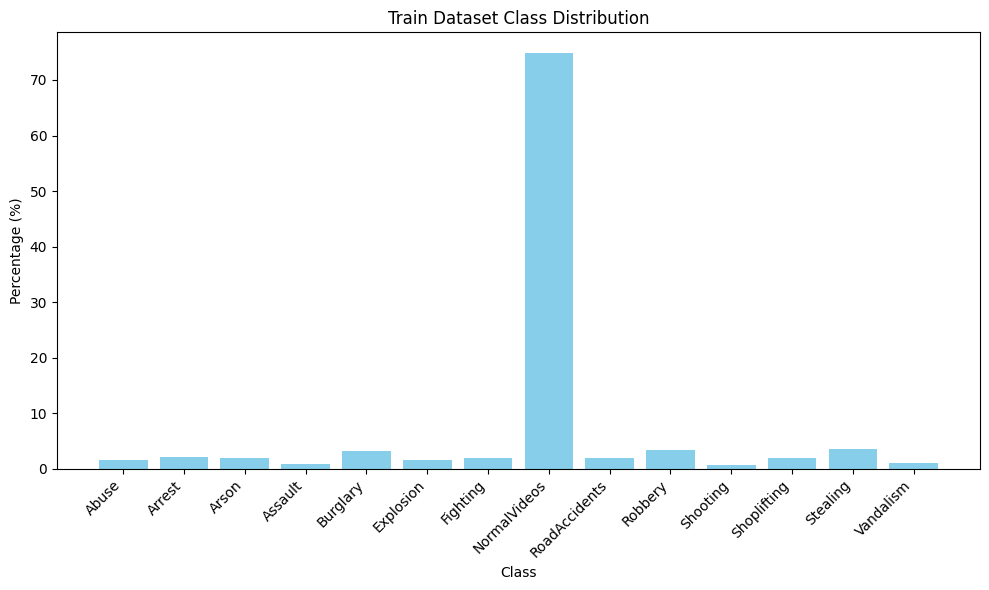

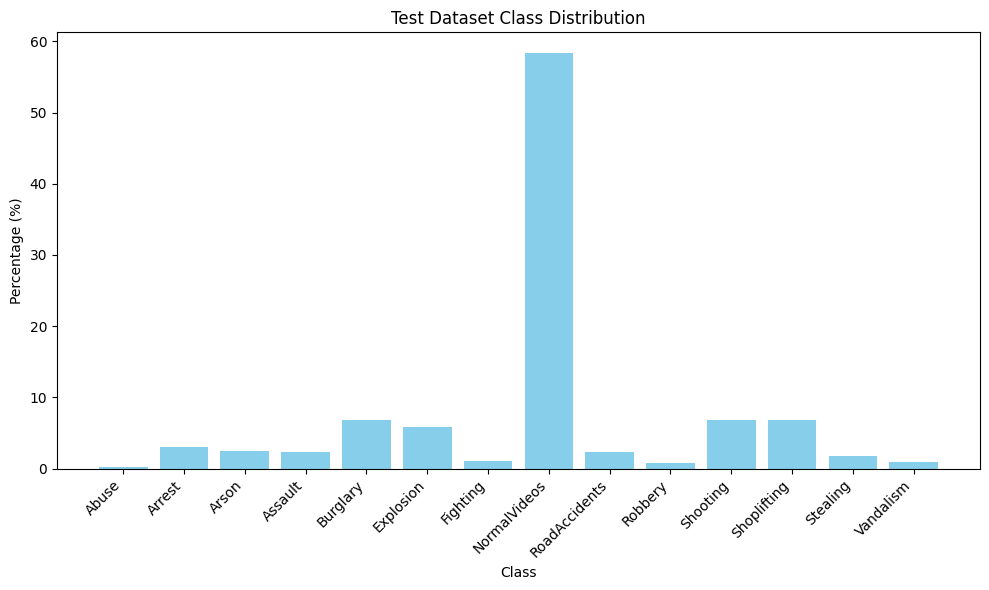

Train Dataset Percentages:
Abuse: 1.51%
Arrest: 2.08%
Arson: 1.93%
Assault: 0.82%
Burglary: 3.12%
Explosion: 1.48%
Fighting: 1.95%
NormalVideos: 74.84%
RoadAccidents: 1.85%
Robbery: 3.28%
Shooting: 0.56%
Shoplifting: 1.96%
Stealing: 3.54%
Vandalism: 1.08%

Test Dataset Percentages:
Abuse: 0.27%
Arrest: 3.02%
Arson: 2.51%
Assault: 2.39%
Burglary: 6.88%
Explosion: 5.85%
Fighting: 1.11%
NormalVideos: 58.35%
RoadAccidents: 2.39%
Robbery: 0.75%
Shooting: 6.85%
Shoplifting: 6.85%
Stealing: 1.78%
Vandalism: 1.00%


In [48]:
import os
import matplotlib.pyplot as plt

classes = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion',
           'Fighting', 'NormalVideos', 'RoadAccidents', 'Robbery',
           'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']

# Folder paths
train_folder = 'Train'
test_folder = 'Test'

def count_files_in_folder(folder_path):
    """Counts the number of files in each subfolder (class) inside the main folder."""
    class_counts = {}
    for class_name in classes:
        class_path = os.path.join(folder_path, class_name)
        if os.path.exists(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
        else:
            class_counts[class_name] = 0
    return class_counts

train_counts = count_files_in_folder(train_folder)
test_counts = count_files_in_folder(test_folder)

total_train_videos = sum(train_counts.values())
total_test_videos = sum(test_counts.values())

train_percentages = {class_name: (count / total_train_videos) * 100 for class_name, count in train_counts.items()}
test_percentages = {class_name: (count / total_test_videos) * 100 for class_name, count in test_counts.items()}

def plot_class_distribution(percentages, dataset_name):
    """Plots a bar chart for class distribution percentages."""
    plt.figure(figsize=(10, 6))
    plt.bar(percentages.keys(), percentages.values(), color='skyblue')
    plt.title(f"{dataset_name} Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_percentages, "Train Dataset")
plot_class_distribution(test_percentages, "Test Dataset")

print("Train Dataset Percentages:")
for class_name, percentage in train_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")

print("\nTest Dataset Percentages:")
for class_name, percentage in test_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")


In [50]:
!pip install opencv-python keras numpy


  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 586.3 kB/s eta 0:00:0000:0100:03


In [1]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array

classes = ['NormalVideos','Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion',
           'Fighting' 'RoadAccidents', 'Robbery', 
           'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Input layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

weights_file = 'model_epoch_10.weights.h5'
try:
    model.load_weights(weights_file)
    print("Weights loaded successfully!")
except ValueError as e:
    print(f"Error loading weights: {e}")


def preprocess_frame(frame, target_size=(224, 224)):
    resized_frame = cv2.resize(frame, target_size)
    image_array = img_to_array(resized_frame) / 255.0
    return np.expand_dims(image_array, axis=0)

link = 0 #"http://172.25.184.202:8080"
cap = cv2.VideoCapture(link)

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    processed_frame = preprocess_frame(frame)
    
    prediction = model.predict(processed_frame)
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]
    
    cv2.putText(frame, f"Detected: {predicted_class}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    cv2.imshow("Real-Time Activity Detection", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


2024-09-17 20:05:05.809276: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-17 20:05:05.925110: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-17 20:05:05.932924: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-17 20:05:05.951881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 20:05:05.977754: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Error loading weights: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(3097600, 128), Received: value.shape=(4608, 128). Target variable: <KerasVariable shape=(3097600, 128), dtype=float32, path=sequential/dense/kernel>

List of objects that could not be loaded:
[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/media/pranjal/New Volume/CODES/Public/Deep_Learning/.venv/lib/python3.10/site-packages/cv2/qt/plugins"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1